## 1-Project ==>  CNN & ANN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras as k
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = k.datasets.fashion_mnist.load_data()

In [3]:
class_name = ["t-shirt", "bantallon", "baltto", "dress", "jacket", "sandal", "unkown", "flaat shoes", "bag", "boat"]

In [4]:
x_train, x_test = x_train/255, x_test/255

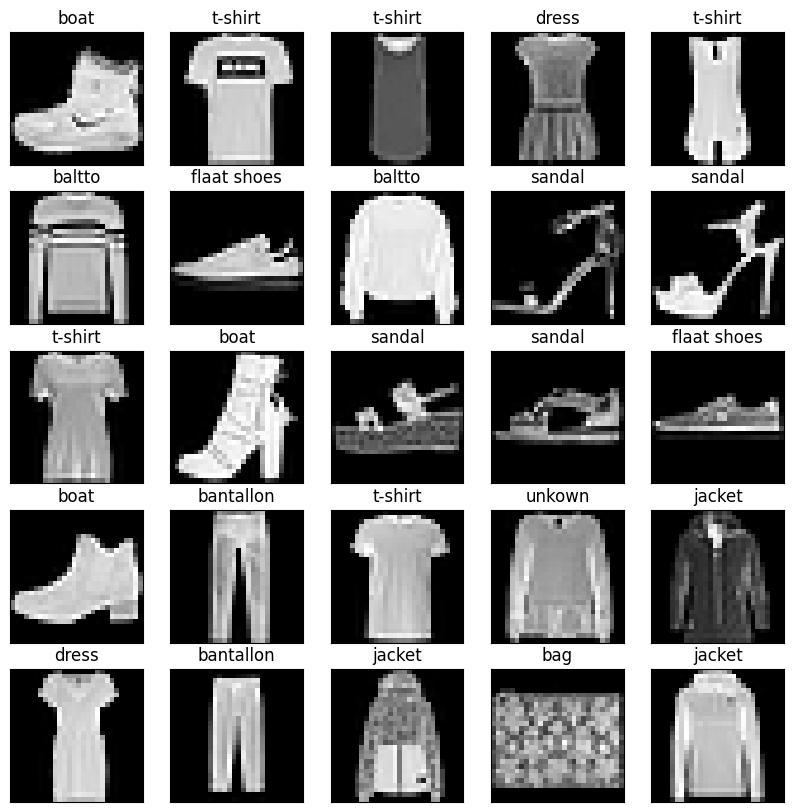

In [69]:
plt.figure(figsize=(10, 10))
for i in range(25):    
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_name[y_train[i]])

In [70]:
x_train[500].shape

(28, 28)

## Build Model CNN, ANN

In [5]:
# Build CNN

model = k.models.Sequential()
model.add(k.layers.Conv2D(32, (2, 2), activation="relu", input_shape=(28, 28, 1)))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(64, (2, 2),activation="relu"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2),activation="relu"))

model.add(k.layers.Flatten())

# Build ANN

model.add(k.layers.Dense(128, activation="relu"))
model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dense(16, activation="relu"))
model.add(k.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [6]:
model.compile(optimizer="Adam", 
             loss=k.losses.SparseCategoricalCrossentropy(), 
             metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5768 - accuracy: 0.7844 - val_loss: 0.4393 - val_accuracy: 0.8367
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3624 - accuracy: 0.8643 - val_loss: 0.3604 - val_accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2987 - accuracy: 0.8894 - val_loss: 0.3174 - val_accuracy: 0.8861
Epoch 4/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2612 - accuracy: 0.9043 - val_loss: 0.2770 - val_accuracy: 0.8991
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2352 - accuracy: 0.9131 - val_loss: 0.2952 - val_accuracy: 0.8943
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2154 - accuracy: 0.9195 - val_loss: 0.2533 - val_accuracy: 0.9096
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1962 - accuracy: 0.9270 - val_loss: 0.2783 -

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2820 - accuracy: 0.9129


In [84]:
new_test = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [94]:
new_test.shape, y_test.shape

((10000, 10), (10000,))

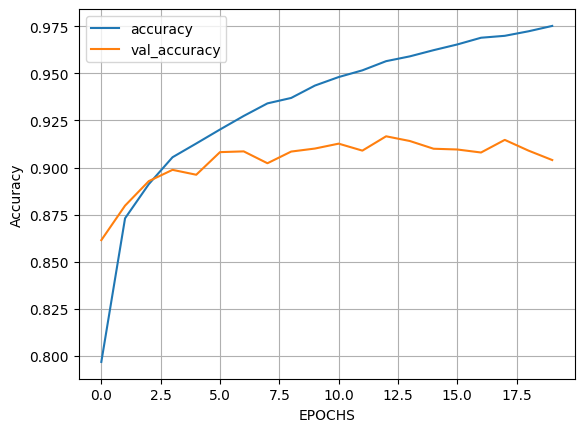

In [96]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

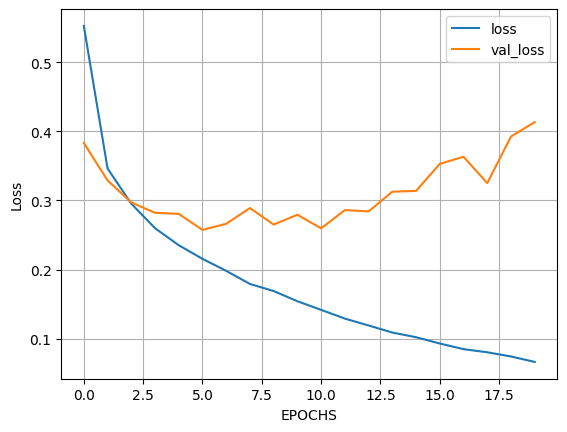

In [97]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.grid()

## 2 - Project ==> RNN

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, r2_score

import math


In [2]:
data = pd.read_csv(r"D:\Courses language programming\6.1_Deep Learning (Udemy)\PDF\CSV & IPNB\3 - RNN - monthly-sunspots.csv")

data.head(10)

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [3]:
data = data.drop(columns="Month", axis=1)

In [4]:
data.head(5)

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0


In [5]:
data = np.array(data.values.astype("float32"))

In [6]:
MMS = MinMaxScaler(feature_range=(0,1))

data = MMS.fit_transform(data)

data

array([[0.22852638],
       [0.24665089],
       [0.2758077 ],
       ...,
       [0.21985814],
       [0.13120566],
       [0.13159968]], dtype=float32)

In [7]:
x_train, x_test, _, _ = train_test_split(data, _, train_size=0.8)

In [8]:
len(x_train), len(data)

(2256, 2820)

In [9]:
y_index = np.arange(12, len(x_train), 12)

train_y = x_train[y_index]

row_x = len(train_y)
train_x = x_train[range(12 * row_x)]

In [10]:
train_x = np.reshape(train_x, (row_x, 12, 1))

In [11]:
y_indexs = np.arange(12, len(x_test), 12)

test_y = x_test[y_indexs]

rows_x = len(test_y)
test_x = x_train[range(12 * rows_x)]
test_x = np.reshape(test_x, (rows_x, 12, 1))

In [12]:
rows_x

46

## Model RNN

In [15]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(50, activation="tanh"))

model_RNN.add(Dense(4, activation="tanh"))

model_RNN.add(Dense(1, activation="tanh"))

model_RNN.compile(loss="mean_squared_error", optimizer="adam")

In [16]:
model_RNN.fit(train_x, train_y, epochs=50)

Epoch 1/50
6/6 [==============================] - 2s 3ms/step - loss: 0.1451
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0661
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 4/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 5/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 7/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0269
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 12/50
6/6 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 13/50
6/6 [==============================] - 0s 3ms/step - loss: 0.

In [17]:
train_pred = model_RNN.predict(train_x)
test_pred = model_RNN.predict(test_x)

2/2 [==============================] - 0s 3ms/step


In [21]:
train_mse = mean_squared_error(train_y, train_pred)
test_mse = mean_squared_error(test_y, test_pred)


print("Mean Squared error for training data is ==>", train_mse)
print("Mean Squared error testting data is ==>", test_mse)

Mean Squared error for training data is ==> 0.02028889
Mean Squared error testting data is ==> 2492.0483


# LSTM ==> long short term memory

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

import tensorflow.keras as k
import tensorflow as tf


In [23]:
data_LSTM = pd.read_csv(r"D:\Courses language programming\6.1_Deep Learning (Udemy)\PDF\CSV & IPNB\4 - LSTM _IBM_2006-01-01_to_2018-01-01.csv", index_col="Date" , parse_dates=["Date"])

In [24]:
data_LSTM.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [25]:
data_LSTM.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [26]:
data_LSTM.dropna(inplace=True)

In [27]:
data_LSTM.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [28]:
data_LSTM.iloc[:, 1:2].head(5)

,High
Date,
2006-01-03,82.55
2006-01-04,82.50
2006-01-05,82.90
2006-01-06,85.03
2006-01-09,84.25


In [29]:
training_data = data_LSTM[:"2016"].iloc[:, 1:2].values
testing_data = data_LSTM["2017":].iloc[:, 1:2].values

In [30]:
training_data.shape

(2769, 1)

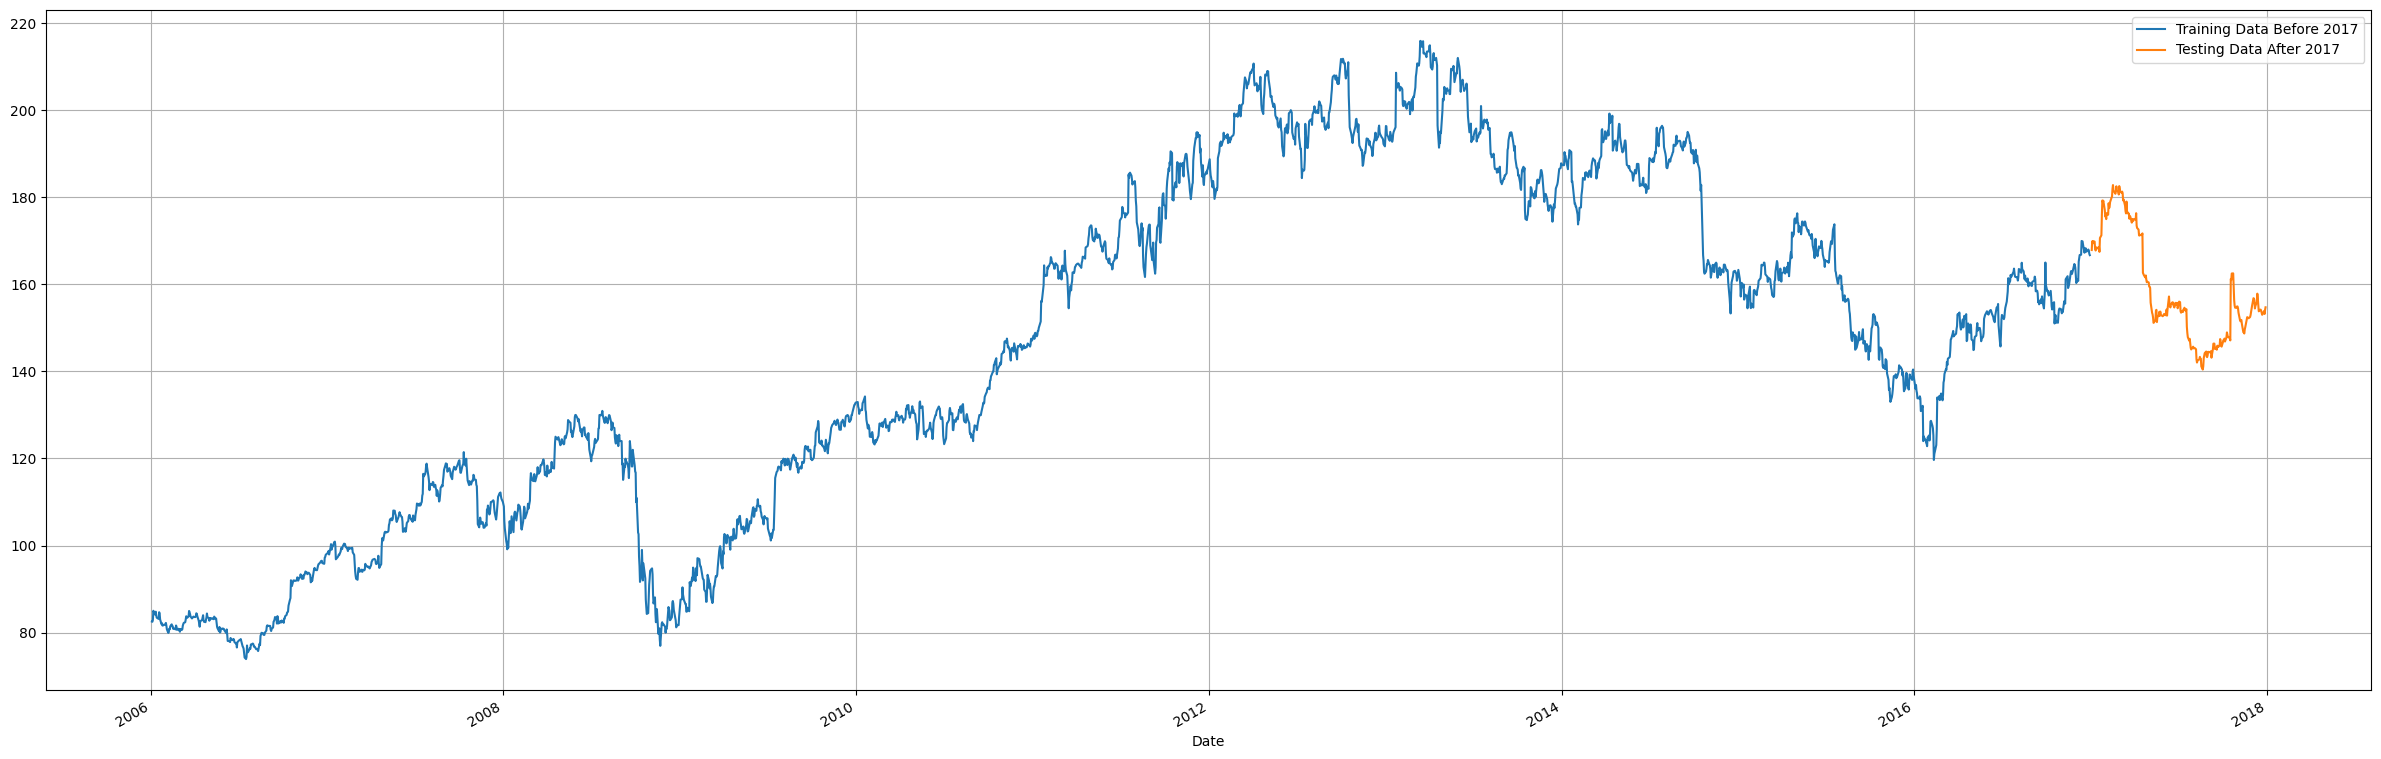

In [31]:
plt.figure(figsize=(30, 10))
data_LSTM["High"][:"2016"].plot(label="Training Data Before 2017")
data_LSTM["High"]["2017":].plot(label="Testing Data After 2017")

plt.legend()
plt.grid()

In [32]:
sc = MinMaxScaler(feature_range=(0, 1))
training_data = sc.fit_transform(training_data)

In [33]:
x_train = []
y_train = []
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train.shape

(2709, 60)

In [35]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [36]:
model_LSTM = k.models.Sequential()
model_LSTM.add(k.layers.LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_LSTM.add(k.layers.Dropout(0.2))

model_LSTM.add(k.layers.LSTM(units=120, activation="relu", return_sequences=True))
model_LSTM.add(k.layers.Dropout(0.2))

model_LSTM.add(k.layers.LSTM(units=50, activation="relu", return_sequences=True))
model_LSTM.add(k.layers.Dropout(0.2))

model_LSTM.add(k.layers.LSTM(units=1, ))

model_LSTM.compile(optimizer="rmsprop", loss="mean_squared_error")

model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 120)           82080     
                                                                 
 dropout_1 (Dropout)         (None, 60, 120)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            34200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 1)                

In [37]:
history = model_LSTM.fit(x_train, y_train, epochs=20)

Epoch 1/20
85/85 [==============================] - 11s 65ms/step - loss: 0.0216
Epoch 2/20
85/85 [==============================] - 5s 64ms/step - loss: 0.0051
Epoch 3/20
85/85 [==============================] - 5s 64ms/step - loss: 0.0040
Epoch 4/20
85/85 [==============================] - 6s 67ms/step - loss: 0.0037
Epoch 5/20
85/85 [==============================] - 6s 65ms/step - loss: 0.0031
Epoch 6/20
85/85 [==============================] - 6s 66ms/step - loss: 0.0031
Epoch 7/20
85/85 [==============================] - 6s 66ms/step - loss: 0.0026
Epoch 8/20
85/85 [==============================] - 5s 63ms/step - loss: 0.0027
Epoch 9/20
85/85 [==============================] - 5s 63ms/step - loss: 0.0025
Epoch 10/20
85/85 [==============================] - 5s 64ms/step - loss: 0.0024
Epoch 11/20
85/85 [==============================] - 5s 63ms/step - loss: 0.0023
Epoch 12/20
85/85 [==============================] - 5s 64ms/step - loss: 0.0023
Epoch 13/20
85/85 [=================

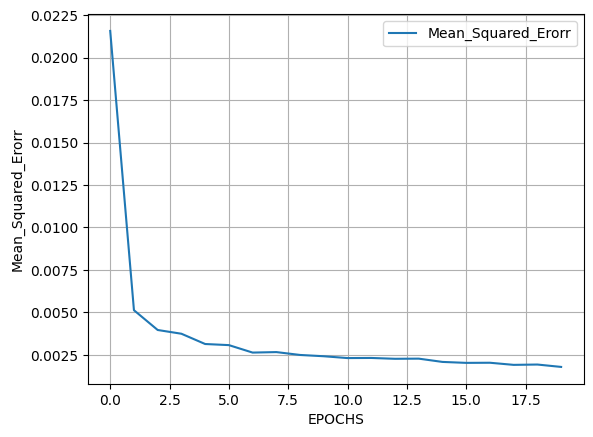

In [38]:
plt.plot(history.history["loss"], label="Mean_Squared_Erorr")

plt.xlabel("EPOCHS")
plt.ylabel("Mean_Squared_Erorr")
plt.legend()
plt.grid()

In [39]:
new_data = pd.concat([data_LSTM["High"][:"2016"], data_LSTM["High"]["2017":]], axis=0)

In [40]:
input_data = new_data[len(new_data) - len(testing_data) - 60:].values
input_data = input_data.reshape(-1, 1)
input_data = sc.transform(input_data)

new_data.shape, testing_data.shape

((3019,), (250, 1))

In [41]:
x_test = []
for i in range(60, 311):
    x_test.append(input_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [42]:
prediction_stock = model_LSTM.predict(x_test)
prediction_stock = sc.inverse_transform(prediction_stock)

8/8 [==============================] - 1s 19ms/step


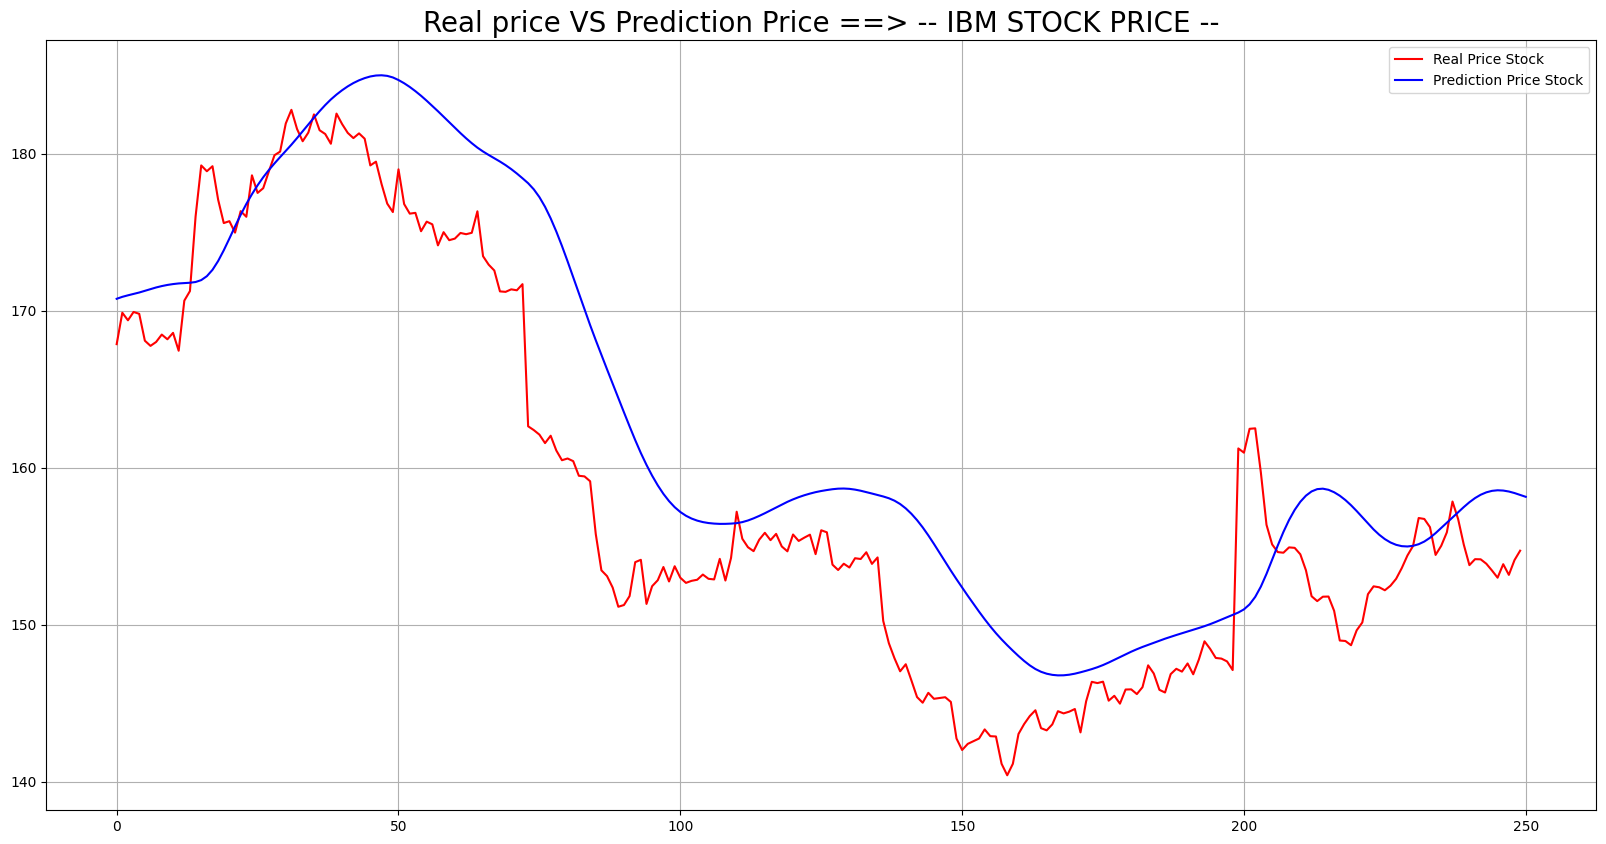

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data, c="r", label="Real Price Stock")
plt.plot(prediction_stock, c="b", label="Prediction Price Stock")

plt.title("Real price VS Prediction Price ==> -- IBM STOCK PRICE --", fontsize=20)

plt.legend()
plt.grid()

In [44]:
from sklearn.metrics import r2_score
print("THE R2_score ==> ", r2_score(prediction_stock[:-1] , testing_data))

THE R2_score ==>  0.7353539175461627


## RNN ==> (GRU LAB)

In [45]:
from __future__ import print_function
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.layers.recurrent import GRU
from tensorflow.keras.layers import GRU
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_squared_error

import os
import warnings
from keras.models import load_model, save_model

In [46]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [47]:
data = pd.read_csv(r"D:\Courses language programming\6.1_Deep Learning (Udemy)\PDF\CSV & IPNB\5 - GRU_hourly_loaddata.csv", header=None, skiprows=1).values


In [48]:
len(data)

35472

In [49]:
data[0:5, 2:3]

array([[1718],
       [1575],
       [1518],
       [1458],
       [1455]], dtype=int64)

In [50]:
hourly_load = [data[i, 2]/100 for i in range(len(data))]

In [51]:
lentgh_of_sequance = 24
def ConvertTimeSeriesTo2DMatrix(vectorSeries, sequance_lentgh):
    matrix = []
    for i in range(len(vectorSeries)-sequance_lentgh +1):
        matrix.append(vectorSeries[i:i+sequance_lentgh])
    return matrix

In [52]:
hourly_load_matrix = ConvertTimeSeriesTo2DMatrix(hourly_load, lentgh_of_sequance)

In [53]:
hourly_load_matrix = np.array(hourly_load_matrix)

shifited_value = hourly_load_matrix.mean()

hourly_load_matrix = hourly_load_matrix - shifited_value

print("hourly_load_matrix" , hourly_load_matrix.shape)

hourly_load_matrix (35449, 24)


In [54]:
hourly_load_matrix

array([[-6.08699781, -7.51699781, -8.08699781, ..., -3.07699781,
        -4.23699781, -5.24699781],
       [-7.51699781, -8.08699781, -8.68699781, ..., -4.23699781,
        -5.24699781, -7.12699781],
       [-8.08699781, -8.68699781, -8.71699781, ..., -5.24699781,
        -7.12699781, -8.35699781],
       ...,
       [-4.75699781, -6.47699781, -8.02699781, ..., -1.03699781,
        -2.10699781, -3.61699781],
       [-6.47699781, -8.02699781, -8.94699781, ..., -2.10699781,
        -3.61699781, -5.39699781],
       [-8.02699781, -8.94699781, -9.53699781, ..., -3.61699781,
        -5.39699781, -6.88699781]])

In [55]:
test_row = int(round(0.9 * hourly_load_matrix.shape[0]))

train_set = hourly_load_matrix[:test_row, :]

np.random.shuffle(hourly_load_matrix)

In [56]:
x_train = train_set[:, :-1]
y_train = train_set[:, -1]

In [57]:
x_test = hourly_load_matrix[test_row:, :-1]
y_test = hourly_load_matrix[test_row:, -1]

In [58]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Building GRU Model 

In [59]:
model_GRU = Sequential()
model_GRU.add(GRU(input_dim=1, units=50, return_sequences=True))
model_GRU.add(Dropout(0.2))

model_GRU.add(GRU(units=50, return_sequences=False))
model_GRU.add(Dropout(0.2))

model_GRU.add(Dense(1, activation="linear"))
model_GRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 50)          7950      
                                                                 
 dropout_3 (Dropout)         (None, None, 50)          0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23301 (91.02 KB)
Trainable params: 23301 (91.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model_GRU.compile(optimizer="adam", loss="mse")

es = EarlyStopping(monitor="val_loss", min_delta=0, patience=5, verbose=1, mode="auto", 
                   baseline=None, restore_best_weights=True)

In [61]:
model_GRU.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.05, verbose=1, callbacks=[es])

mse = model_GRU.evaluate(x_test, y_test)

Epoch 1/10
119/119 [==============================] - 7s 32ms/step - loss: 4.6394 - val_loss: 0.6886
Epoch 2/10
119/119 [==============================] - 3s 27ms/step - loss: 0.8982 - val_loss: 0.4850
Epoch 3/10
119/119 [==============================] - 3s 27ms/step - loss: 0.7524 - val_loss: 0.4202
Epoch 4/10
119/119 [==============================] - 3s 28ms/step - loss: 0.6698 - val_loss: 0.3807
Epoch 5/10
119/119 [==============================] - 3s 27ms/step - loss: 0.6222 - val_loss: 0.3687
Epoch 6/10
119/119 [==============================] - 3s 27ms/step - loss: 0.5912 - val_loss: 0.3255
Epoch 7/10
119/119 [==============================] - 3s 27ms/step - loss: 0.5496 - val_loss: 0.2975
Epoch 8/10
119/119 [==============================] - 3s 27ms/step - loss: 0.5362 - val_loss: 0.3068
Epoch 9/10
119/119 [==============================] - 3s 26ms/step - loss: 0.5168 - val_loss: 0.2692
Epoch 10/10
111/111 [==============================] - 0s 3ms/step - loss: 0.2731


In [62]:
mse

0.2731182277202606

In [63]:
prediction_value = model_GRU.predict(x_test)
prediction_value = np.reshape(prediction_value, (-1, 1))

111/111 [==============================] - 1s 4ms/step


In [64]:
print("THE R2_score ==> ", r2_score(prediction_value + shifited_value, y_test + shifited_value))

THE R2_score ==>  0.9891001492757108
